<a href="https://colab.research.google.com/github/rominicky/mineria-texto-python/blob/main/ulrich_exploraciones_textuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis textual de texto [Comentarios de Álvar Núñez Cabeza de Vaca](https://github.com/rominicky/comentarios-cabeza-de-vaca)

#### Por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

Esta notebook tiene como objetivo analizar el texto en formato plano elaborado para este [proyecto](https://github.com/rominicky/comentarios-cabeza-de-vaca). El propósito es generar visualizaciones basadas en el análisis textual, mediante tareas de limpieza, segmentación, estudio de frecuencia léxica, visualización y extracción de entidades. A través de estos procedimientos, se busca explorar las relaciones entre personajes, pueblos originarios mencionados a lo largo del trayecto y episodios narrados en esta crónica.

Para ello se emplearán diversas bibliotecas, entre ellas: [spaCy](https://spacy.io/), [NLTK](https://www.nltk.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/). A lo largo del código se incluye una breve descripción de cada una de ellas y su aplicación específica en el análisis.

### Esquema

* Instalación y activación de librerías y módulos
* Carga del texto desde GitHub
* Limpieza y tokenización del texto
* Cálculo de etiquetas POS
* Cálculo de sustantivos, adjetivos y verbos más comunes
* Limpieza para realizar NER
* Gráficos de frecuencias
* Nube de palabras
* Gráficos de Etiquetado POS
* Gráfico de frecuencia de NER
* Gráfico de frecuencia entre los términos 'gobernador' e 'Irala'
* Gráficos de bigramas frecuentes
* Análisis y gráficos de temas con LDA
* Análisis por temas en el texto separado por capítulos
* Contexto textual de diferentes términos
* Análisis de sentimiento utilizando el modelo BETO
* Co-ocurrencia de entidades por párrafos

### Instalación y activación de librerías y módulos

In [ ]:
 # SpaCy: librería para procesamiento de lenguaje natural
!pip install spacy
# NLTK: librería para procesamiento de lenguaje natural
!pip install nltk
# Pandas: librería para manipulación y análisis de datos
!pip install pandas
# Matplotlib, Seaborn, Plotly: librerías para generar visualizaciones
!pip install matplotlib seaborn plotly
# Requests: librería para realizar solicitudes HTTP
# BeautifulSoup: librería para extraer datos de archivos HTML y XML
!pip install requests beautifulsoup4
#Descarga del modelo de entrenamiento y procesado de textos para el español, md indica modelo de tamaño mediano
!python -m spacy download es_core_news_lg 
# WordCloud: librería para generar nubes de palabras
!pip install wordcloud
# Transformers y Torch: librerías para modelos de lenguaje y aprendizaje profundo
!pip install transformers torch

' # SpaCy: librería para procesamiento de lenguaje natural\n!pip install spacy\n# NLTK: librería para procesamiento de lenguaje natural\n!pip install nltk\n# Pandas: librería para manipulación y análisis de datos\n!pip install pandas\n# Matplotlib, Seaborn, Plotly: librerías para generar visualizaciones\n!pip install matplotlib seaborn plotly\n# Requests: librería para realizar solicitudes HTTP\n# BeautifulSoup: librería para extraer datos de archivos HTML y XML\n!pip install requests beautifulsoup4\n#Descarga del modelo de entrenamiento y procesado de textos para el español, md indica modelo de tamaño mediano\n!python -m spacy download es_core_news_lg \n# WordCloud: librería para generar nubes de palabras\n!pip install wordcloud\n# Transformers y Torch: librerías para modelos de lenguaje y aprendizaje profundo\n!pip install transformers torch\n '

In [ ]:
#Librerías y módulos para generar visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#Requests librería para importar url
import requests
# Re y BeautifulSoup para extraer datos de archivos HTML y XML
from bs4 import BeautifulSoup
import re
#NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
# SpaCy para procesamiento de lenguaje natural
import spacy
import pandas as pd
import matplotlib.pyplot as plt
#Unicodedata: módulo para trabajar con caracteres Unicode
import unicodedata
# IPython.display: módulo para mostrar objetos en Jupyter Notebook
from IPython.display import display
# Collections para contar elementos
from collections import Counter
from wordcloud import WordCloud
# Gensim: librería para modelado de temas y procesamiento de lenguaje natural
from gensim import corpora, models
# NLTK para encontrar bigramas
from nltk.collocations import BigramCollocationFinder
# NLTK para medidas de asociación de bigramas
from nltk.metrics import BigramAssocMeasures
# NetworkX: librería para crear y manipular grafos
import networkx as nx
# Itertools: módulo para crear iteradores eficientes
from itertools import combinations
# Transformers: librería para modelos de lenguaje y aprendizaje profundo
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
# Recursos de NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
# Modelo para el etiquetado POS
nltk.download('averaged_perceptron_tagger')
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_lg")

' #Librerías y módulos para generar visualizaciones\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n#Requests librería para importar url\nimport requests\n# Re y BeautifulSoup para extraer datos de archivos HTML y XML\nfrom bs4 import BeautifulSoup\nimport re\n#NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nfrom nltk import pos_tag\n# SpaCy para procesamiento de lenguaje natural\nimport spacy\nimport pandas as pd\nimport matplotlib.pyplot as plt\n#Unicodedata: módulo para trabajar con caracteres Unicode\nimport unicodedata\n# IPython.display: módulo para mostrar objetos en Jupyter Notebook\nfrom IPython.display import display\n# Collections para contar elementos\nfrom collections import Counter\nfrom wordcloud import WordCloud\n# Gensi

### Carga del texto desde GitHub

In [301]:
#función para descardar desde una url y con advertencia si existe error en el sitio web
def download_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Excepciones por error de acceso
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error de descarga de la URL: {e}")
        return None

url = "https://raw.githubusercontent.com/rominicky/comentarios-cabeza-de-vaca/refs/heads/main/assets/downloads/comentarios-indice.txt"
comentarios_txt = download_text_from_url(url)

if comentarios_txt:
    print(comentarios_txt[:400])

else:
    print("Error al tratar de descargar el archivo") #advertencia que no se puedo descargar el archivo


COMENTARIOS

Cabeza de Vaca, adelantado y gobernador del Río de la Plata

Escriptos por Pero Hernández, escribano y secretario de la provincia, y dirigidos al serenísimo, muy alto y muy poderoso señor el Infante Don Carlos N. S.

CAPÍTULO PRIMERO
De los comentarios de Alvar Núñez Cabeza de Vaca
Después que Dios nuestro Señor fue servido de sacar a Alvar Núñez Cabeza de Vaca del captiverio y trabaj


In [302]:
#Otra alternativa es cargar el texto desde una ruta relativa
""" with open(r'C:\~\downloads\comentarios.txt', 'r', encoding='utf-8') as f:
    comentarios_txt = f.read()

# Imprimir los primeros 500 caracteres
print(comentarios_txt[:500]) """

" with open(r'C:\\~\\downloads\\comentarios.txt', 'r', encoding='utf-8') as f:\n    comentarios_txt = f.read()\n\n# Imprimir los primeros 500 caracteres\nprint(comentarios_txt[:500]) "

### Limpieza y tokenización del texto


A las palabras vacías, stopwords, generales del idioma español se añadieron las más frecuentes que se pueden considerar a una primera vista del texto, denominadas 'stopwords del siglo XVI'.

In [303]:
#Limpieza, con funciones con NLTK, para eliminar stopwords y tokenizar el texto
# Función de normalización y eliminación de signos no útiles
def normalizar(texto):
    texto = unicodedata.normalize('NFKD', texto)
    return ''.join([c for c in texto if not unicodedata.combining(c)])

# Stopwords del siglo XVI
stopwords_siglo_XVI_raw = {
    'aquel', 'aquella', 'ansi', 'aquellos', 'aquelas', 'sino', 'assi', 'assí', 'así', 'aun',
    'à', 'á', 'ó', 'ò', 'i', 'o',
    'hast', 'dende', 'dixo', 'dixeron', 'dixieron',
    'desque', 'después', 'allí', 'día', 'porque', 'pues', 'otro', 'otros', 'tanto', 'todo', 'muy',
    'más', 'menos', 'era', 'capítulos', 'capítulo', 'fue', 'fueron', 'había', 'tenía', 'mandó', 'vino', 'dio', 'dijo',
    'CAPÍTULO', 'CAPITULO', 'CAPÍTULOS', 'ÍNDICE', 'INDICE', '\n\nCAPÍTULO V\nDe', '\n\nINDICE', '\n\n'
}

# Normalizamos todas las stopwords
stopwords_siglo_XVI = set([normalizar(p.lower()) for p in stopwords_siglo_XVI_raw])
nltk_stopwords = set([normalizar(p.lower()) for p in stopwords.words('spanish')])
stopwords_completas = nltk_stopwords.union(stopwords_siglo_XVI)

# Función auxiliar: normalizar tildes y eliminar signos no útiles
def normalizar(texto):
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join([c for c in texto if not unicodedata.combining(c)])
    return texto

# Función de limpieza del texto, se utiliza expresiones regulares para encontrar y eleminar determinadas cadenas de caracteres
def limpiar_texto(texto):
    texto = texto.lower()
    texto = normalizar(texto)
    texto = re.sub(r'ÍNDICE|CAP[ÍI]TULO\s+[XLIVC\d]+\s*[\w\s]*', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.lower().split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas and len(palabra) > 2] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

# Función para limpiar y tokenizar
def clean_and_tokenize(text):
    # Eliminar caracteres especiales y tokenizar
    text = normalizar(text)
    tokens = word_tokenize(re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ]', ' ', text.lower()))
    # Filtrar stopwords
    tokens = [word for word in tokens if word not in stopwords_completas and len(word) > 2]
    return tokens

In [304]:
#carga de texto para limpieza
text = comentarios_txt
texto_limpio = limpiar_texto(text)

""" # Guarda el texto limpio
with open('texto_limpio.txt', 'w', encoding='utf-8') as file:
    file.write(texto_limpio)
 """
print("Archivo 'texto_limpio.txt' creado exitosamente.")
print(texto_limpio[:1000])

Archivo 'texto_limpio.txt' creado exitosamente.
comentarios cabeza vaca adelantado gobernador rio plata escriptos hernandez escribano secretario provincia dirigidos serenisimo alto poderoso senor infante don carlos primero comentarios alvar nunez cabeza vaca dios senor servido sacar alvar nunez cabeza vaca captiverio trabajos diez anos florida reinos ano senor ano vinieron corte majestad personas rio plata dar cuenta majestad suceso armada enviado don pedro mendoza trabajos escaparon suplicar servido proveer socorrer peresciesen quedaban pocos sabido majestad tomase cierto asiento capitulacion alvar nunez cabeza vaca socorrellos asiento capitulacion efectuo mediante dicho cabeza vaca ofrescio socorrer gastaria jomada socorro hacer caballos armas ropas bastimentos cosas ocho mil ducados capitulacion asiento majestad tomo hizo merced gobernacion capitania general tierra provincia titulo adelantado asimesmo hizo merced dozavo tierra provincia hobiese entrase saliese dicho alvar nunez gast

In [305]:
# Aplicar la función clean_and_tokenize
texto = comentarios_txt
tokens = clean_and_tokenize(texto)

""" # Guardar los tokens en un archivo (como texto o como lista)
with open("comentarios_tokens.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(" ".join(tokens))  # Los tokens se guardan como texto
 """
print("Tokens guardados en 'comentarios_tokens.txt'.")
print(tokens[:25])

Tokens guardados en 'comentarios_tokens.txt'.
['comentarios', 'cabeza', 'vaca', 'adelantado', 'gobernador', 'rio', 'plata', 'escriptos', 'hernandez', 'escribano', 'secretario', 'provincia', 'dirigidos', 'serenisimo', 'alto', 'poderoso', 'senor', 'infante', 'don', 'carlos', 'primero', 'comentarios', 'alvar', 'nunez', 'cabeza']


In [306]:
# Procesamiento con SpaCy
doc = nlp(texto)
# lista de tuplas (palabra, etiqueta POS)
datos = [(token.text, token.pos_) for token in doc]
# Conversión de la lista en un dataframe
df = pd.DataFrame(datos, columns=["Palabra", "Etiqueta_POS"])
# Guardado del DataFrame en CSV
#df.to_csv("etiquetas_pos_comentarios.csv", index=False, encoding="utf-8")
#print("Archivo CSV generado con éxito: etiquetas_pos_comentarios.csv")
print(df.head(20))

        Palabra Etiqueta_POS
0   COMENTARIOS         NOUN
1          \n\n        SPACE
2        Cabeza        PROPN
3            de          ADP
4          Vaca        PROPN
5             ,        PUNCT
6    adelantado          ADJ
7             y        CCONJ
8    gobernador         NOUN
9           del          ADP
10          Río        PROPN
11           de          ADP
12           la          DET
13        Plata        PROPN
14         \n\n        SPACE
15    Escriptos        PROPN
16          por          ADP
17         Pero        CCONJ
18    Hernández        PROPN
19            ,        PUNCT


In [307]:
# Procesamiento con SpaCy
documento = nlp(comentarios_txt)

# lista de tuplas (palabra, etiqueta POS)
datos1 = [(token.text, token.pos_) for token in documento]

# Conversión de la lista en un dataframe
df1 = pd.DataFrame(datos1, columns=["Palabra", "Etiqueta_POS"])

# Guardado del DataFrame en CSV
#df.to_csv("etiquetas_pos_comentarios.csv", index=False, encoding="utf-8")

#print("Archivo CSV generado con éxito: etiquetas_pos_comentarios.csv")

print(df1.head(20))

        Palabra Etiqueta_POS
0   COMENTARIOS         NOUN
1          \n\n        SPACE
2        Cabeza        PROPN
3            de          ADP
4          Vaca        PROPN
5             ,        PUNCT
6    adelantado          ADJ
7             y        CCONJ
8    gobernador         NOUN
9           del          ADP
10          Río        PROPN
11           de          ADP
12           la          DET
13        Plata        PROPN
14         \n\n        SPACE
15    Escriptos        PROPN
16          por          ADP
17         Pero        CCONJ
18    Hernández        PROPN
19            ,        PUNCT


### Cálculo de etiquetas POS

In [308]:
# Calculo de la cantidad de cada tipo de etiqueta POS
pos_counts = df['Etiqueta_POS'].value_counts()
pos_counts

Etiqueta_POS
NOUN     10777
ADP       9255
DET       8136
VERB      7966
PUNCT     6296
PRON      6150
CCONJ     4920
ADJ       2516
ADV       2190
AUX       2115
SCONJ     1961
PROPN     1782
NUM        640
SPACE      269
INTJ         4
PART         1
SYM          1
Name: count, dtype: int64

In [309]:
# Calculo de la cantidad de cada tipo de etiqueta POS
pos_counts1 = df1['Etiqueta_POS'].value_counts()
pos_counts1

Etiqueta_POS
NOUN     10777
ADP       9255
DET       8136
VERB      7966
PUNCT     6296
PRON      6150
CCONJ     4920
ADJ       2516
ADV       2190
AUX       2115
SCONJ     1961
PROPN     1782
NUM        640
SPACE      269
INTJ         4
PART         1
SYM          1
Name: count, dtype: int64

### Cálculo de sustantivos, adjetivos y verbos más comunes según etiquetado POS

In [310]:
# Función que trae palabras más frecuentes con etiqueta POS
def get_top_n_words(df, pos_tag, n=20):
    words = df[df['Etiqueta_POS'] == pos_tag]['Palabra'].value_counts().head(n)
    return words

# Más frecuentes según categoría gramatical
top_nouns = get_top_n_words(df, 'NOUN')
top_adjectives = get_top_n_words(df, 'ADJ')
top_verbs = get_top_n_words(df, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns)
print("\nAdjetivos más frecuentes:\n", top_adjectives)
print("\nVerbos más frecuentes:\n", top_verbs)


Sustantivos más frecuentes:
 Palabra
indios         652
tierra         498
gobernador     434
gente          283
río            231
cristianos     151
puerto         145
camino         132
día            131
días           123
españoles      108
guerra          91
generación      87
bastimentos     86
pueblos         83
parte           81
ciudad          76
tiempo          76
oficiales       73
agua            69
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
gran           112
grandes         98
dicho           86
naturales       83
principal       67
principales     54
grande          48
dichos          42
buena           34
buen            30
mayor           30
dicha           30
buenos          25
contentos       22
juntos          21
cargados        21
CAPÍTULO        20
cierto          17
dichas          17
poblada         16
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
hacer       141
mandó       132
tenían      116
ansí         86
dar          85
ti

In [311]:
# Más frecuentes según categoría gramatical
top_nouns1 = get_top_n_words(df1, 'NOUN')
top_adjectives1 = get_top_n_words(df1, 'ADJ')
top_verbs1 = get_top_n_words(df1, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns1)
print("\nAdjetivos más frecuentes:\n", top_adjectives1)
print("\nVerbos más frecuentes:\n", top_verbs1)

Sustantivos más frecuentes:
 Palabra
indios         652
tierra         498
gobernador     434
gente          283
río            231
cristianos     151
puerto         145
camino         132
día            131
días           123
españoles      108
guerra          91
generación      87
bastimentos     86
pueblos         83
parte           81
ciudad          76
tiempo          76
oficiales       73
agua            69
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
gran           112
grandes         98
dicho           86
naturales       83
principal       67
principales     54
grande          48
dichos          42
buena           34
buen            30
mayor           30
dicha           30
buenos          25
contentos       22
juntos          21
cargados        21
CAPÍTULO        20
cierto          17
dichas          17
poblada         16
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
hacer       141
mandó       132
tenían      116
ansí         86
dar          85
ti

### Limpieza para realizar NER

In [312]:
#Cálculo de nombres y lugares en el texto 
#Realizo una limpieza especial para NER
def limpiar_texto2(texto):
    texto = normalizar(texto)
    texto = re.sub(r'INDICE|ÍNDICE|CAP[ÍI]TULO\s+[XLIVC\d]+\s*[\w\s]*', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas and len(palabra) > 2] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

#función para encontrar nombre de personas y lugares
def find_names_and_places(text, language="es"):
    if language == "es":
        doc = nlp(text)
    else:
        raise ValueError("Error de idioma")

    names = []
    places = []
    for ent in doc.ents:
        if ent.label_ == "PER":
            names.append(ent.text)
        elif ent.label_ == "LOC" or ent.label_ == "GPE":
            places.append(ent.text)

    return names, places


text = limpiar_texto2(comentarios_txt)

#aplico la funcion al texto
spanish_names, spanish_places = find_names_and_places(text, language="es")

print("Nombres", spanish_names[:25])
print("Lugares:", spanish_places[:25])


Nombres ['Hernandez', 'senor Infante Don Carlos CAPITULO PRIMERO', 'Alvar Nunez Cabeza Vaca Despues Dios Senor', 'Alvar Nunez Cabeza Vaca', 'Pedro Mendoza', 'Majestad', 'Alvar Nunez Cabeza Vaca', 'Cabeza Vaca', 'Majestad', 'Alvar Nunez', 'Majestad', 'murio ningun', 'porne aqui', 'Majestad', 'Santa Catalina', 'Majestad', 'Bernaldo Armenta natural Cordoba', 'Alonso Lebron', 'Felipe Caceres', 'Pedro Mendoza', 'Juan Ayolas', 'Pedro Mendoza', 'Domingo Irala vizcaino', 'Juan Ayolas', 'Juan Ayolas']
Lugares: ['Rio Plata', 'Florida', 'ano Senor', 'corte Majestad', 'Rio Plata', 'capitania general tierra', 'Sevilla', 'Canaria', 'Cadiz', 'isla Palma', 'Cabo Verde', 'isla Santiago', 'Espana', 'Palma isla Cabo Verde', 'Indias', 'Cananea pasado Cabo Frio', 'partio paso rio bahia', 'San Francisco', 'Cananea', 'San Francisco', 'isla Santa Catalina', 'Brasil', 'isla Santa Catalina', 'Espana', 'Rio Plata']


## Gráficos
##### Frecuencia de palabras

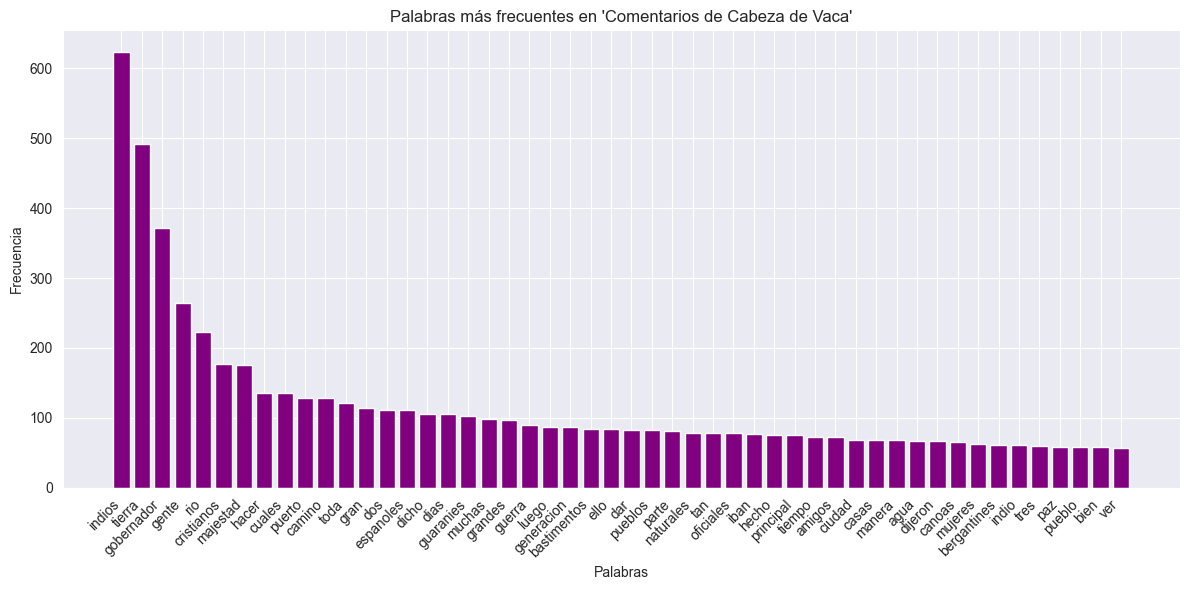

In [313]:
# Gráfico de palabas más frecuentes en texto que fue procesado mediante limpieza

""" # Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Tokenización
palabras = texto_limpio.split()

# Cálcilo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='purple')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Comentarios de Cabeza de Vaca'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

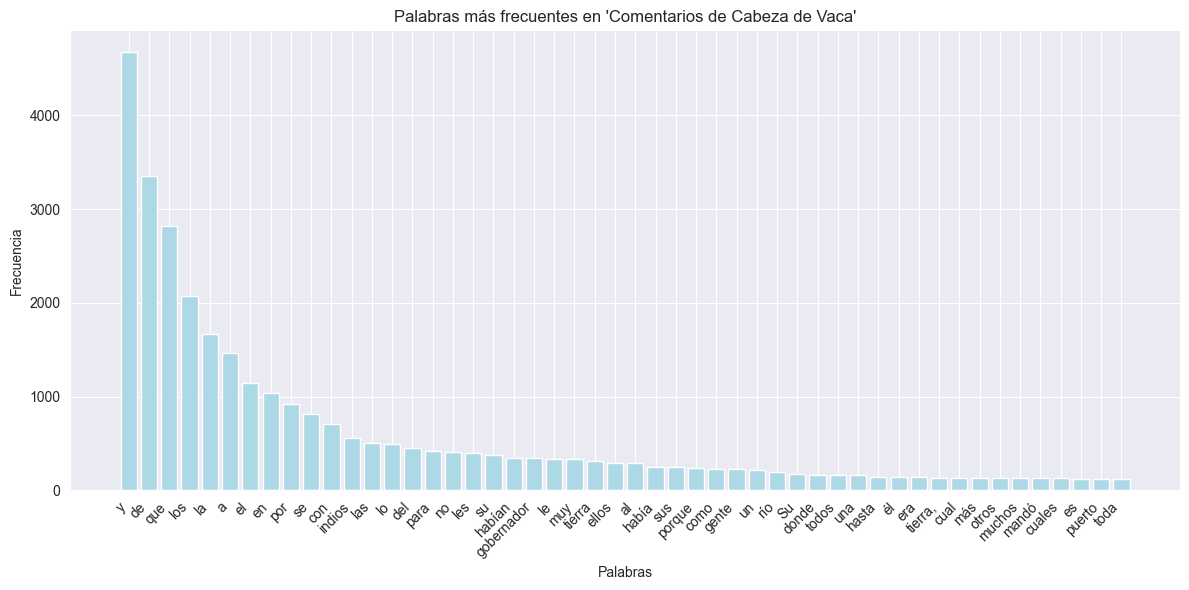

In [314]:
# Gráfico de palabas más frecuentes en texto sin procesar
""" # Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Tokenización
palabras = comentarios_txt.split()

# Cálculo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='lightblue')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Comentarios de Cabeza de Vaca'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Nube de palabras

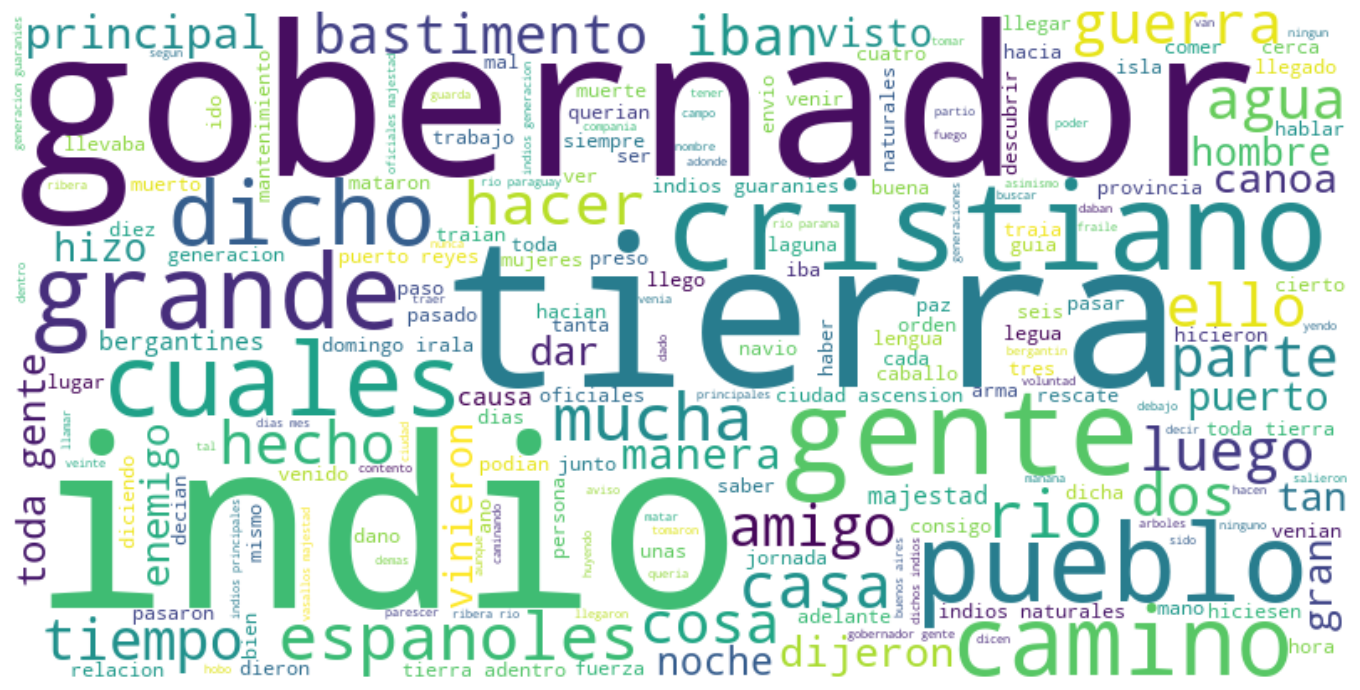

In [315]:
# Nube de palabras en texto procesado

""" # Lee el texto
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

# Muestra la nube de palabras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

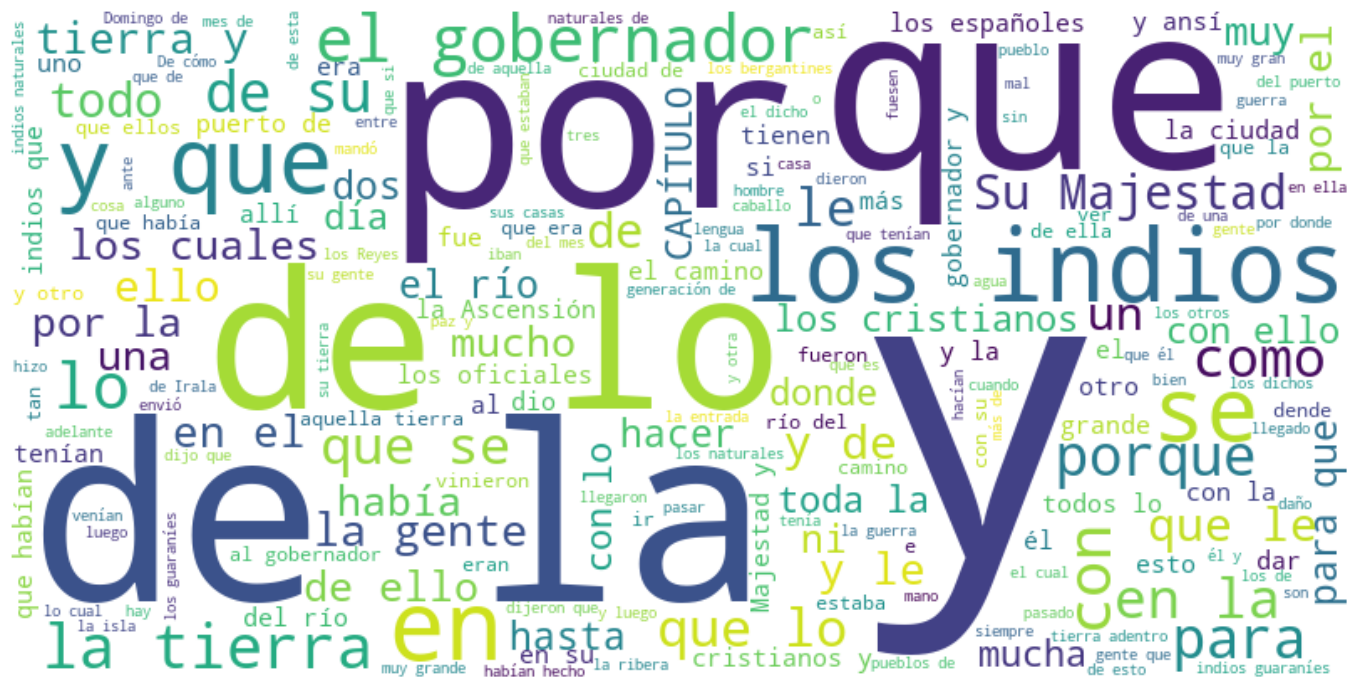

In [316]:
# Nube de palabras en texto sin procesar
# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comentarios_txt)

# Muestra la nube de palabras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

#### Gráficos de Etiquetado POS en texto procesado

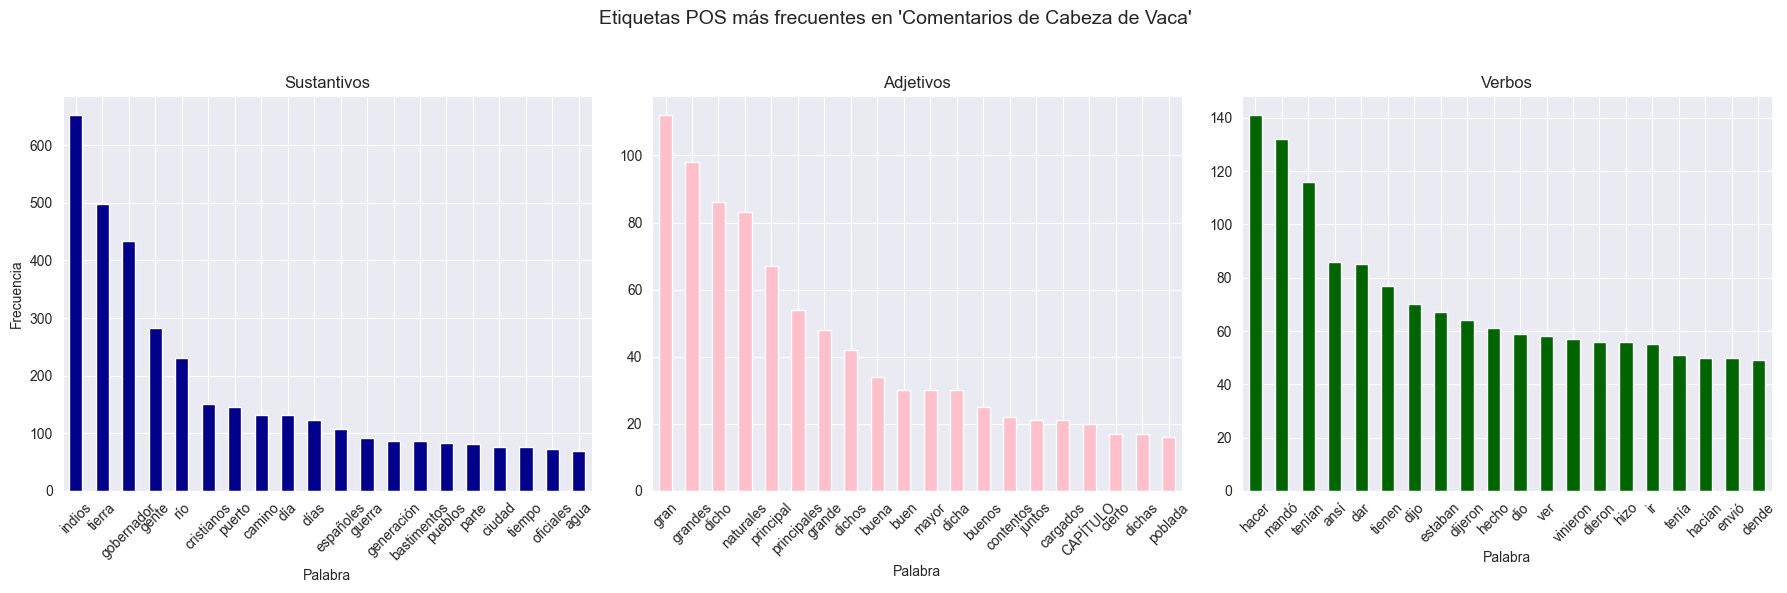

In [317]:
sns.set_style("darkgrid")

# Tamaño de la figura
plt.figure(figsize=(18, 6))
plt.suptitle("Etiquetas POS más frecuentes en 'Comentarios de Cabeza de Vaca'", fontsize=14)

# Gráfico de Sustantivos
ax1 = plt.subplot(1, 3, 1)
top_nouns.plot(kind='bar', color='darkblue', ax=ax1)
ax1.set_title('Sustantivos', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de Adjetivos
ax2 = plt.subplot(1, 3, 2)
top_adjectives.plot(kind='bar', color='pink', ax=ax2)
ax2.set_title('Adjetivos', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Gráfico de Verbos
ax3 = plt.subplot(1, 3, 3)
top_verbs.plot(kind='bar', color='darkgreen', ax=ax3)
ax3.set_title('Verbos', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Frecuencia de NER

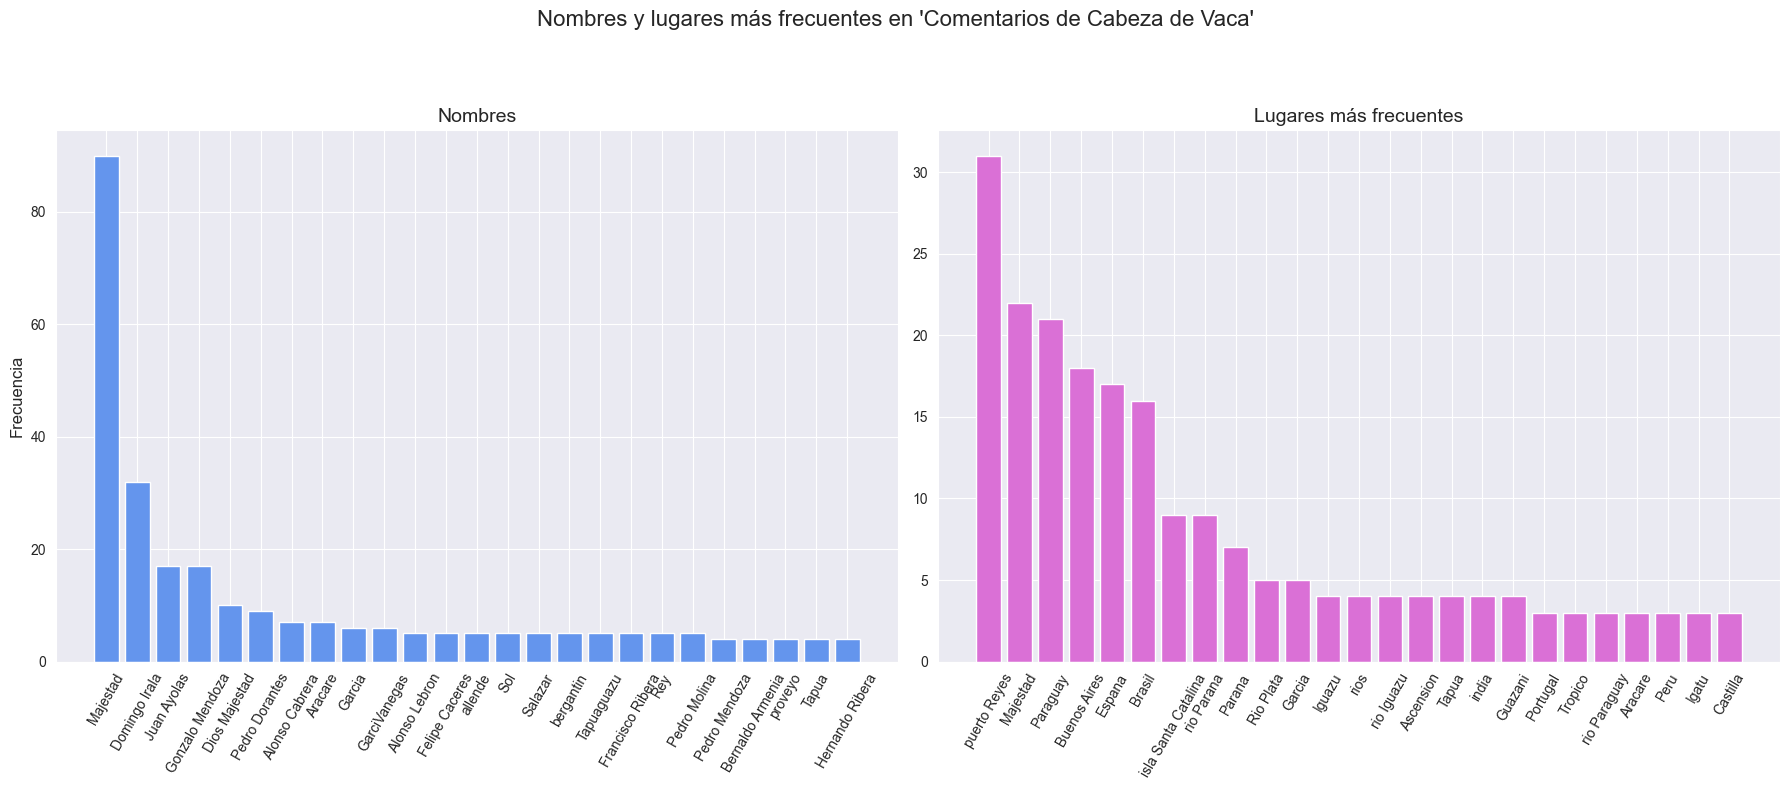

In [318]:
# Cálculo de la frecuencia de nombres y lugares
name_counts = Counter(spanish_names)
place_counts = Counter(spanish_places)

#Listas para graficar
names, name_freqs = zip(*name_counts.most_common(25))
places, place_freqs = zip(*place_counts.most_common(25))

# Tamaño de la figura
plt.figure(figsize=(18, 8))
plt.suptitle("Nombres y lugares más frecuentes en 'Comentarios de Cabeza de Vaca'", fontsize=16)

# Gráfico de Nombres
ax1 = plt.subplot(1, 2, 1)
ax1.bar(names, name_freqs, color='cornflowerblue', width=0.8)
ax1.set_title('Nombres', fontsize=14)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.tick_params(axis='x', rotation=60, labelsize=10)

# Gráfico de Lugares
ax2 = plt.subplot(1, 2, 2)
ax2.bar(places, place_freqs, color='orchid', width=0.8)
ax2.set_title('Lugares más frecuentes', fontsize=14)
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


#### Gráfico de frecuencia entre los términos "gobernador" e "Irala"

In [319]:
# Simplificá el texto a minúsculas
text = limpiar_texto(comentarios_txt)

# Buscá las menciones
vaca_menciones = re.findall(r'\b(cabeza de vaca|adelantado|gobernador)\b', text)
irala_menciones = re.findall(r'\b(irala|domingo martínez de irala|capitán irala|domingo irala|domingo de irala|martinez de irala)\b', text)

print("Menciones de Cabeza de Vaca:", len(vaca_menciones))
print("Menciones de Irala:", len(irala_menciones))

# Extraer oraciones donde se mencione a Vaca o Irala
oraciones_vaca = [sent.text for sent in doc.sents if "vaca" in sent.text.lower() or "gobernador" in sent.text.lower() or "adelantado" in sent.text.lower()]
oraciones_irala = [sent.text for sent in doc.sents if "irala" in sent.text.lower() or "domingo irala" in sent.text.lower() or "domingo de irala" in sent.text.lower()]

tokens_irala = []
for oracion in oraciones_irala:
    tokens_irala.extend(clean_and_tokenize(oracion))

tokens_vaca = []
for oracion in oraciones_vaca:
    tokens_vaca.extend(clean_and_tokenize(oracion))

""" tokens_irala = clean_and_tokenize(oraciones_irala)
tokens_vaca = clean_and_tokenize(oraciones_vaca) """

def contexto_palabra(tokens, palabra_objetivo, ventana=5):
    contexto = []
    for i, token in enumerate(tokens):
        if palabra_objetivo in token:
            inicio = max(0, i - ventana)
            fin = min(len(tokens), i + ventana + 1)
            contexto.append(tokens[inicio:fin])
    return contexto

# Frecuencias de palabras cerca de "irala" y "vaca"
cooc_irala = contexto_palabra(tokens_irala, "irala")
cooc_vaca = contexto_palabra(tokens_vaca, "gobernador")

from itertools import chain

print("\nPalabras cercanas a 'Domingo de Irala':")
# Flatten the list of contexts and count word frequencies
cooc_irala_flat = list(chain.from_iterable(cooc_irala))
cooc_irala_counter = Counter(cooc_irala_flat)
print(cooc_irala_counter.most_common(10))

print("\nPalabras cercanas a 'Cabeza de Vaca':")
cooc_vaca_flat = list(chain.from_iterable(cooc_vaca))
cooc_vaca_counter = Counter(cooc_vaca_flat)
print(cooc_vaca_counter.most_common(10))

Menciones de Cabeza de Vaca: 374
Menciones de Irala: 35

Palabras cercanas a 'Domingo de Irala':
[('domingo', 41), ('irala', 40), ('oficiales', 15), ('gobernador', 10), ('capitan', 8), ('indios', 7), ('vizcaino', 5), ('tierra', 5), ('luego', 5), ('hacer', 5)]

Palabras cercanas a 'Cabeza de Vaca':
[('gobernador', 470), ('indios', 108), ('gente', 88), ('tierra', 80), ('majestad', 47), ('rio', 41), ('oficiales', 35), ('puerto', 31), ('luego', 31), ('espanoles', 27)]


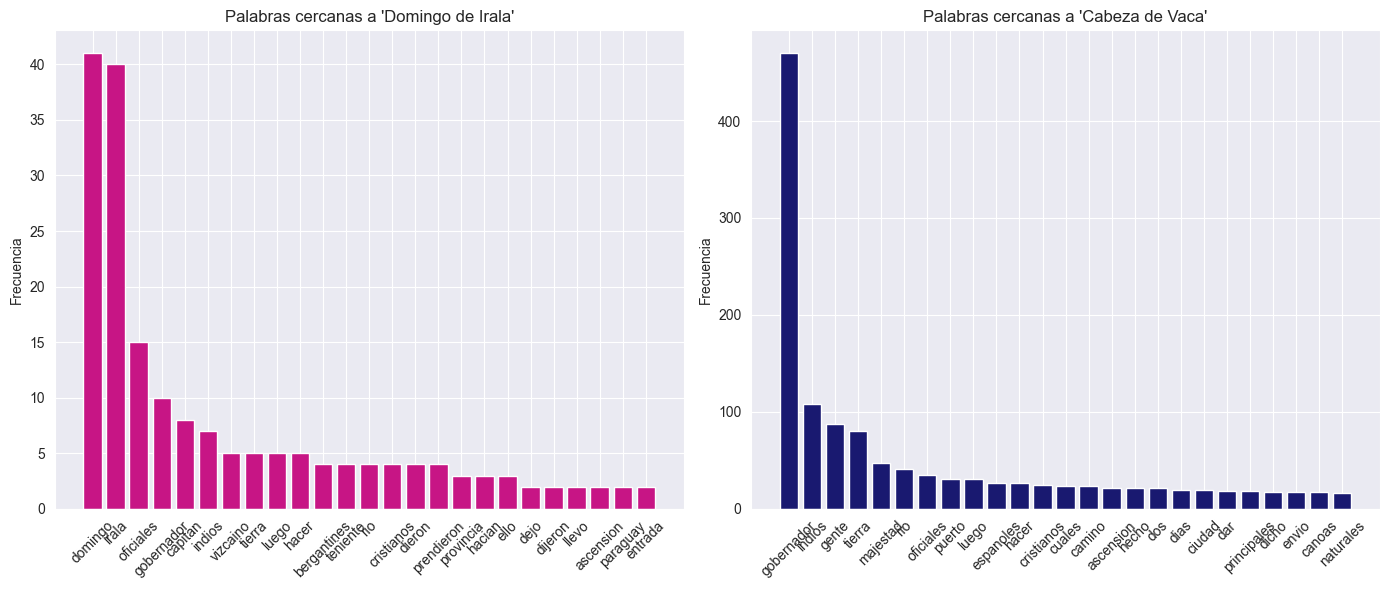

In [320]:
# Selecciona las 10 palabras más frecuentes cerca de "irala" y "vaca"
top_irala = cooc_irala_counter.most_common(25)
top_vaca = cooc_vaca_counter.most_common(25)

# Desempaqueta palabras y frecuencias
words_irala, freqs_irala = zip(*top_irala)
words_vaca, freqs_vaca = zip(*top_vaca)

plt.figure(figsize=(14, 6))

# Gráfico para "irala"
plt.subplot(1, 2, 1)
plt.bar(words_irala, freqs_irala, color='mediumvioletred')
plt.title("Palabras cercanas a 'Domingo de Irala'")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")

# Gráfico para "vaca"
plt.subplot(1, 2, 2)
plt.bar(words_vaca, freqs_vaca, color='midnightblue')
plt.title("Palabras cercanas a 'Cabeza de Vaca'")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#### Cálculo y gráfico de Bigramas frecuentes

In [321]:
finder = BigramCollocationFinder.from_words(texto_limpio.split())
finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)

[('ciudad', 'ascension'),
 ('domingo', 'irala'),
 ('toda', 'gente'),
 ('puerto', 'reyes'),
 ('tierra', 'adentro'),
 ('buenos', 'aires'),
 ('indios', 'guaranies'),
 ('gonzalo', 'mendoza'),
 ('juan', 'ayolas'),
 ('vasallos', 'majestad'),
 ('santa', 'catalina'),
 ('dias', 'mes'),
 ('rio', 'paraguay'),
 ('rio', 'parana'),
 ('mujeres', 'hijos'),
 ('religiosos', 'clerigos'),
 ('costa', 'brasil'),
 ('isla', 'santa'),
 ('oficiales', 'majestad'),
 ('arcos', 'flechas')]

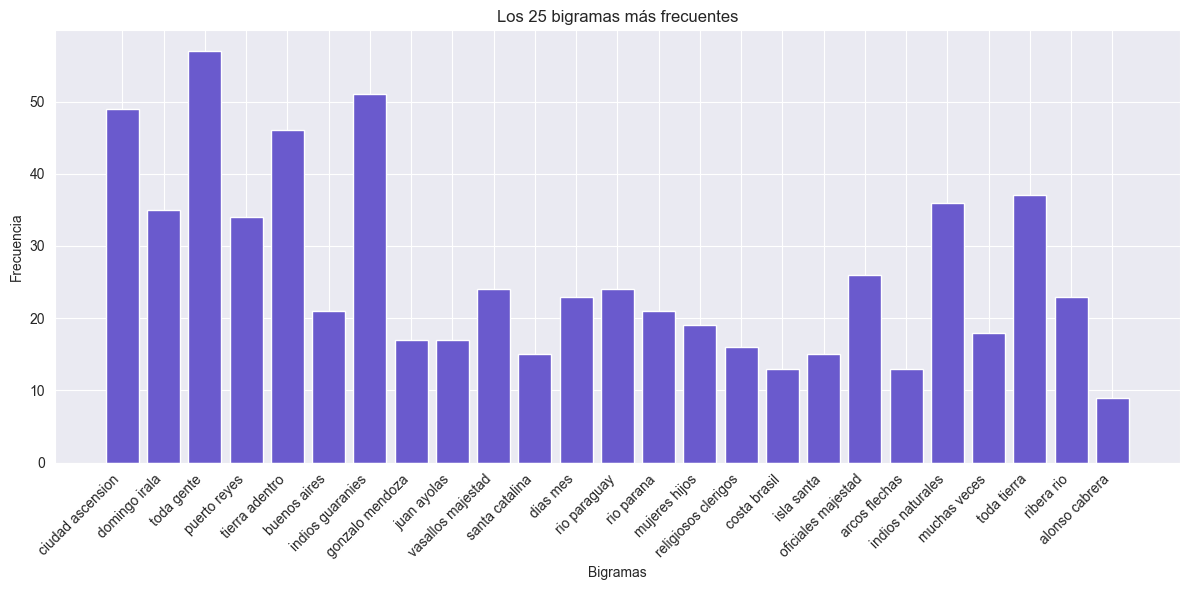

In [322]:
# Obtener los 25 bigramas principales y sus frecuencias
top_bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 25)
bigram_freqs = finder.ngram_fd

# Preparar datos para el gráfico
bigrams = [' '.join(bigram) for bigram in top_bigrams]
frecuencias = [bigram_freqs[bigram] for bigram in top_bigrams]

plt.figure(figsize=(12, 6))
plt.bar(bigrams, frecuencias, color='slateblue')
plt.xlabel("Bigramas")
plt.ylabel("Frecuencia")
plt.title("Los 25 bigramas más frecuentes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Análisis de temas con LDA
El análisis LDA (Latent Dirichlet Allocation) es una técnica que identifica automáticamente los temas principales presentes en un conjunto de textos. Cada "tema" es un grupo de palabras que suelen aparecer juntas, cada documento puede estar compuesto por varios temas en diferentes proporciones.
El análisis LDA ayuda a presentar los temas del texto, agrupando palabras relacionadas, y el gráfico permite visualizar fácilmente las palabras más relevantes de cada tema así como su peso relativo.

Tema 1: 0.004*"indios" + 0.003*"tierra" + 0.003*"gobernador" + 0.001*"gente" + 0.001*"rio" + 0.001*"cristianos" + 0.001*"puerto"
Tema 2: 0.025*"indios" + 0.020*"tierra" + 0.015*"gobernador" + 0.011*"gente" + 0.009*"rio" + 0.007*"cristianos" + 0.007*"majestad"
Tema 3: 0.001*"indios" + 0.001*"tierra" + 0.001*"gobernador" + 0.001*"gente" + 0.000*"rio" + 0.000*"cuales" + 0.000*"hacer"
Tema 4: 0.003*"indios" + 0.002*"tierra" + 0.002*"gobernador" + 0.001*"rio" + 0.001*"gente" + 0.001*"majestad" + 0.001*"cristianos"
Tema 5: 0.002*"indios" + 0.001*"tierra" + 0.001*"gobernador" + 0.001*"rio" + 0.001*"gente" + 0.001*"cristianos" + 0.001*"majestad"


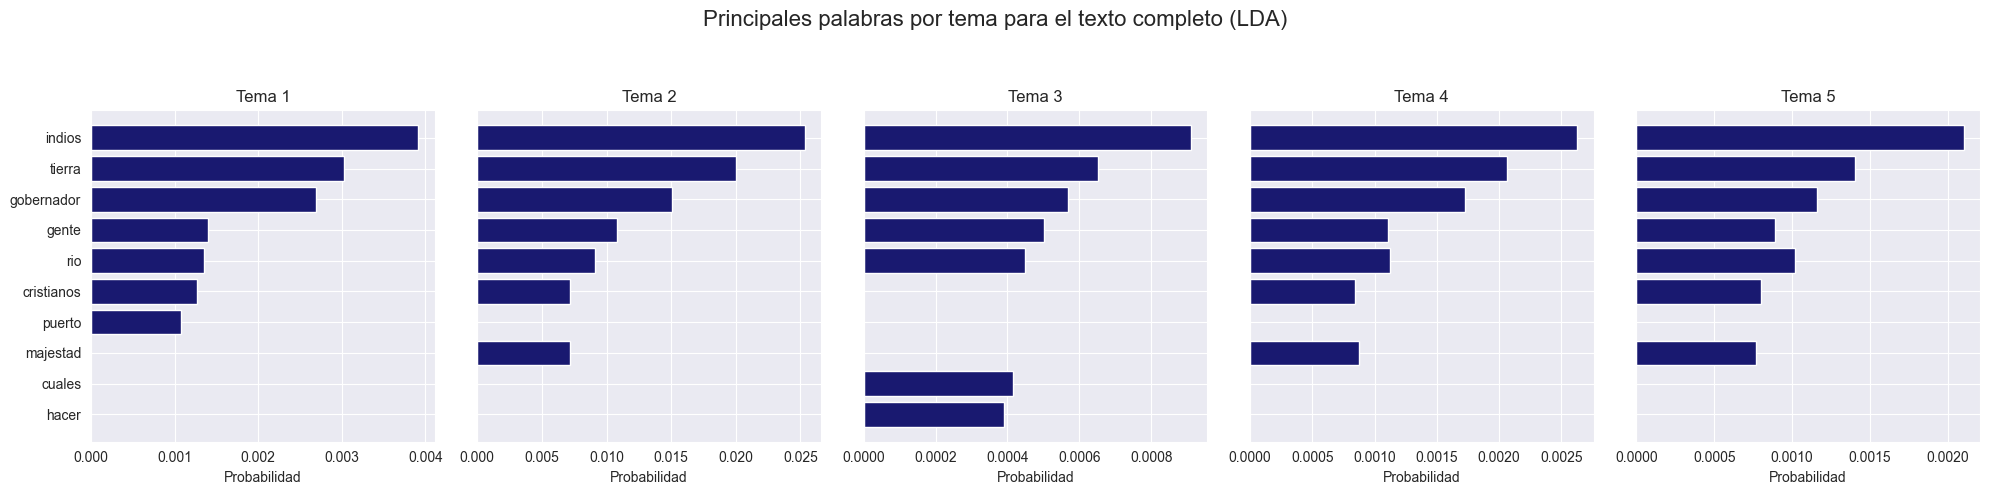

In [323]:
# Utilizamos el texto procesado completo sin separar capítulos
tokens_limpio = clean_and_tokenize(texto_limpio)

# Crea el diccionario y el corpus para LDA
dictionary_limpio = corpora.Dictionary([tokens_limpio])
corpus_limpio = [dictionary_limpio.doc2bow(tokens_limpio)]

# Entrena el modelo LDA (puedes ajustar num_topics)
lda_model_limpio = models.LdaModel(corpus_limpio, num_topics=5, id2word=dictionary_limpio, passes=10)

# Muestra los temas
for idx, topic in lda_model_limpio.print_topics(num_words=7):
    print(f"Tema {idx+1}: {topic}")

# Visualización de los temas generados por LDA en el texto limpio
# Obtener los temas y sus palabras clave
topics = lda_model_limpio.show_topics(num_topics=5, num_words=7, formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig.suptitle("Principales palabras por tema para el texto completo (LDA)", fontsize=16)

for i, (topic_id, word_probs) in enumerate(topics):
    words, probs = zip(*word_probs)
    axes[i].barh(words, probs, color='midnightblue')
    axes[i].set_title(f"Tema {topic_id+1}")
    axes[i].invert_yaxis()
    axes[i].set_xlabel("Probabilidad")

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()  

#### Análisis por temas en el texto separado por capítulos

In [324]:
# Analizaremos los temas, pero realizando una división del texto en capítulos
capitulos = re.split(r'(CAP[IÍ]TULO\s+\w+)', comentarios_txt.upper())
capitulos_completos = [''.join(capitulos[i:i+2]) for i in range(1, len(capitulos), 2)]

print(f"Se encontraron {len(capitulos_completos)} capítulos")
print(capitulos_completos[15][:1500])  # Un capítulo ejemplo


Se encontraron 84 capítulos
CAPÍTULO XVI

DE CÓMO MATAN A SUS ENEMIGOS QUE CAPTIVAN, Y SE LOS COMEN

LUEGO DENDE A POCO QUE HOBO LLEGADO EL GOBERNADOR A LA DICHA CIUDAD DE LA ASCENSIÓN, LOS POBLADORES Y CONQUISTADORES QUE EN ELLA HALLÓ, LE DIERON GRANDES QUERELLAS Y CLAMORES CONTRA LOS OFICIALES DE SU MAJESTAD, Y MANDÓ JUNTAR TODOS LOS INDIOS NATURALES, VASALLOS DE SU MAJESTAD; Y ASÍ JUNTOS, DELANTE Y EN PRESENCIA DE LOS RELIGIOSOS Y CLÉRIGOS, LES HIZO SU PARLAMENTO, DICIÉNDOLES CÓMO SU MAJESTAD LO HABÍA ENVIADO A LOS FAVORESCER Y DAR A ENTENDER CÓMO HABÍAN DE VENIR EN CONOSCIMIENTO DE DIOS Y SER CRISTIANOS, POR LA DOCTRINA Y ENSEÑAMIENTO DE LOS RELIGIOSOS Y CLÉRIGOS QUE PARA ELLO ERAN VENIDOS, COMO MINISTROS DE DIOS, Y PARA QUE ESTUVIESEN DEBAJO DE LA OBEDIENCIA DE SU MAJESTAD, Y FUESEN SUS VASALLOS, Y QUE DE ESTA MANERA SERÍAN MEJOR TRATADOS Y FAVORECIDOS QUE HASTA ALLÍ LO HABÍAN SIDO; Y ALLENDE DE ESTO, LES FUE DICHO Y AMONESTADO QUE SE APARTASEN DE COMER CARNE HUMANA, POR EL GRAVE 

In [325]:
# Tokenización de cada capítulo por separado
tokens_capitulos = [clean_and_tokenize(cap) for cap in capitulos_completos]
dictionary = corpora.Dictionary(tokens_capitulos)
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_capitulos]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
lda_model.print_topics()

[(0,
  '0.030*"indios" + 0.020*"tierra" + 0.014*"gobernador" + 0.012*"rio" + 0.008*"cristianos" + 0.008*"gente" + 0.008*"puerto" + 0.007*"majestad" + 0.006*"espanoles" + 0.006*"hacer"'),
 (1,
  '0.015*"indios" + 0.013*"gobernador" + 0.012*"tierra" + 0.009*"gente" + 0.006*"majestad" + 0.006*"dicho" + 0.005*"grandes" + 0.005*"dos" + 0.005*"dias" + 0.004*"pueblos"'),
 (2,
  '0.015*"rio" + 0.013*"gobernador" + 0.012*"indios" + 0.012*"gente" + 0.011*"tierra" + 0.007*"majestad" + 0.005*"canoas" + 0.005*"parte" + 0.005*"hacer" + 0.005*"oficiales"'),
 (3,
  '0.015*"gobernador" + 0.007*"tierra" + 0.005*"majestad" + 0.005*"gente" + 0.005*"toda" + 0.004*"agua" + 0.004*"dos" + 0.004*"indios" + 0.004*"gran" + 0.004*"muchas"'),
 (4,
  '0.029*"indios" + 0.023*"tierra" + 0.017*"gobernador" + 0.013*"gente" + 0.009*"camino" + 0.009*"cristianos" + 0.006*"guaranies" + 0.006*"puerto" + 0.006*"rio" + 0.006*"principal"')]

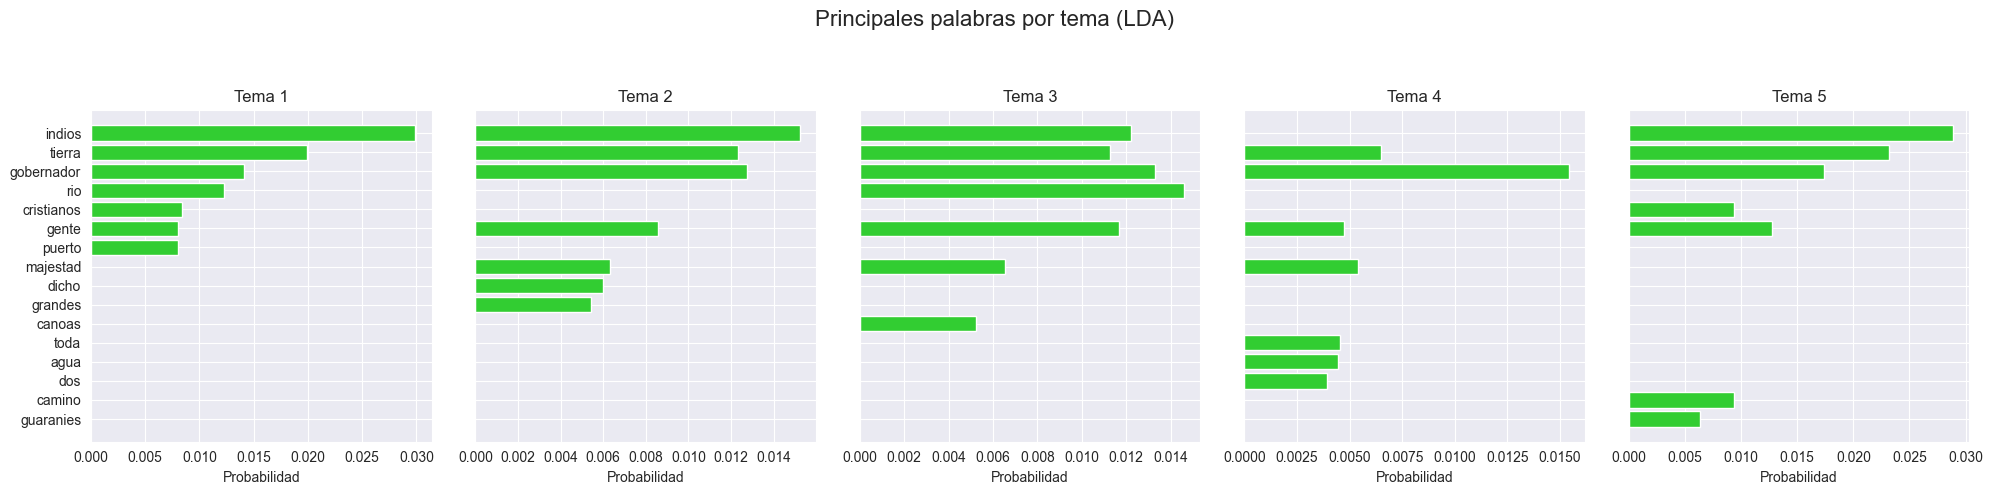

In [326]:
# Visualización de los temas generados por LDA
# Obtener los temas y sus palabras clave
topics = lda_model.show_topics(num_topics=5, num_words=7, formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig.suptitle("Principales palabras por tema (LDA)", fontsize=16)

for i, (topic_id, word_probs) in enumerate(topics):
    words, probs = zip(*word_probs)
    axes[i].barh(words, probs, color='limegreen')
    axes[i].set_title(f"Tema {topic_id+1}")
    axes[i].invert_yaxis()
    axes[i].set_xlabel("Probabilidad")

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

#### Contexto textual de diferentes términos

In [327]:
# Función KWIC (Key Word in Context) para encontrar palabras en contexto
# Esta función busca una palabra específica en un texto y devuelve el contexto alrededor de esa palabra.
def kwic(texto, palabra, window=5):
    import re
    oraciones = re.split(r'[.!?]', texto)
    resultados = []
    for oracion in oraciones:
        if palabra.lower() in oracion.lower():
            tokens = oracion.split()
            for i, token in enumerate(tokens):
                if palabra.lower() in token.lower():
                    izquierda = ' '.join(tokens[max(0, i - window):i])
                    derecha = ' '.join(tokens[i+1:i + window + 1])
                    resultados.append((izquierda, token, derecha))
    return resultados
kwic_resultados = kwic(comentarios_txt, "irala") #se puede modificar la palabra a analizar
for izq, token, der in kwic_resultados[:20]: print(f"...{izq} [{token}] {der}...")

...encargado a un Domingo de [Irala,] vizcaíno, a quien dejó por...
...culpa del dicho Domingo de [Irala,] vizcaíno, capitán de los bergantines;...
...tierra y provincia Domingo de [Irala,] vizcaíno, por quien sucedió la...
...y informaron que Domingo de [Irala] dende la ciudad de la...
...payaguos captivo; y Domingo de [Irala] se retiró de la entrada,...
...que llevaba ante Domingo de [Irala,] teniente de gobernador en la...
...por complacer a Domingo de [Irala,] porque le había quitado el...
...envió al capitán Domingo de [Irala,] vizcaíno, por capitán de ellos,...
...fundiciones, y de Domingo de [Irala,] vizcaíno, que se decía y...
...XXXIX Cómo vino Domingo de [Irala] A 15 días del mes...
...de la Ascensión Domingo de [Irala,] con los tres bergantines que...
...y luego como Domingo de [Irala] hobo dado la relación al...
...que había traído Domingo de [Irala,] y les rogó que sobre...
...fuese el capitán Domingo de [Irala] a favorescer los indios amigos,...
...y mandó que Domingo de 

#### Análisis de sentimiento utilizando el modelo BETO
**BETO** es un modelo de lenguaje basado en BERT (modelo de lenguaje basado en transformadores), adaptado para el español.

In [328]:
# Modelo BETO fine-tuned para análisis de sentimiento en español
modelo = "finiteautomata/beto-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(modelo)
modelo_beto = AutoModelForSequenceClassification.from_pretrained(modelo)

clasificador_sentimiento = pipeline(
    "sentiment-analysis", 
    model="finiteautomata/beto-sentiment-analysis",
    tokenizer=tokenizer,
    truncation=True
)

def sentimiento_beto(textos):
    resultados = clasificador_sentimiento(textos)
    salida = []
    for texto, r in zip(textos, resultados):
        salida.append({
            "texto": texto[:500] + "...",
            "sentimiento": r['label'],
            "confianza": round(r['score'], 3)
        })
    return salida

Device set to use cpu


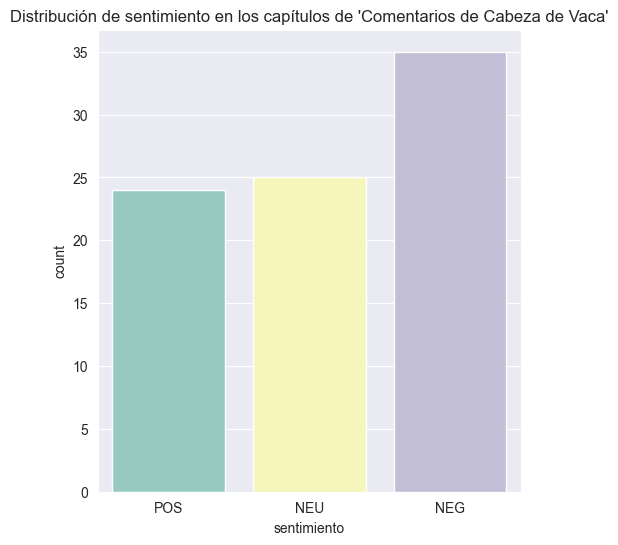

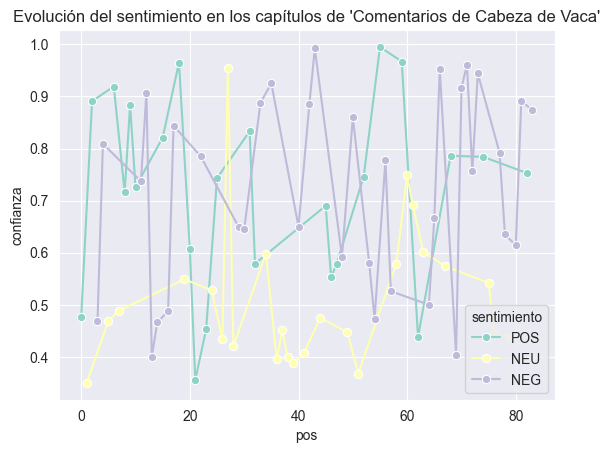

In [329]:
#fragmento el texto en fragmentos más pequeños para análisis
res = sentimiento_beto(capitulos_completos)
df_sentimiento = pd.DataFrame(res)
# Visualización de los resultados de sentimiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="sentimiento", hue="sentimiento", data=df_sentimiento, palette="Set3", legend=False)
plt.title("Distribución de sentimiento en los capítulos de 'Comentarios de Cabeza de Vaca'")
plt.show()
df_sentimiento["pos"] = range(len(df_sentimiento))  # índice como posición
sns.lineplot(x="pos", y="confianza", hue="sentimiento", data=df_sentimiento, palette="Set3", marker="o")
plt.title("Evolución del sentimiento en los capítulos de 'Comentarios de Cabeza de Vaca'")
plt.show()


In [330]:
# Armado de DataFrame con los resultados de capítulos y sentimientos
df_sentimiento['capitulo_nro'] = df_sentimiento.index + 1
# Clasificación de niveles de confianza
df_sentimiento["nivel_confianza"] = df_sentimiento["confianza"].apply(lambda x: "BAJA" if x < 0.5 else "ALTA")

# Agrupación por sentimiento
tabla_sentimiento = (
    df_sentimiento
    .groupby(['sentimiento', 'nivel_confianza'])
    .agg(
        Capítulos=('capitulo_nro', list),
        cantidad=('capitulo_nro', 'count'),
        conf_min=('confianza', 'min'),
        conf_max=('confianza', 'max'),
        conf_media=('confianza', 'mean')
    )
    .reset_index()
)

In [331]:
# presentación del DF final
display(tabla_sentimiento)


,sentimiento,nivel_confianza,Capítulos,cantidad,conf_min,conf_max,conf_media
0,NEG,ALTA,"[5, 12, 13, 18, 23, 30, 31, 34, 36, 41, 43, 44...",29,0.500,0.992,0.777793
1,NEG,BAJA,"[4, 14, 15, 17, 55, 70]",6,0.400,0.488,0.449833
2,NEU,ALTA,"[20, 25, 28, 35, 59, 61, 62, 64, 68, 76]",10,0.528,0.954,0.636600
3,NEU,BAJA,"[2, 6, 8, 27, 29, 37, 38, 39, 40, 42, 45, 50, ...",15,0.350,0.489,0.425200
4,POS,ALTA,"[3, 7, 9, 10, 11, 16, 19, 21, 26, 32, 33, 46, ...",20,0.553,0.995,0.776750
5,POS,BAJA,"[1, 22, 24, 63]",4,0.356,0.476,0.430750


#### Nubes de palabras por sentimiento

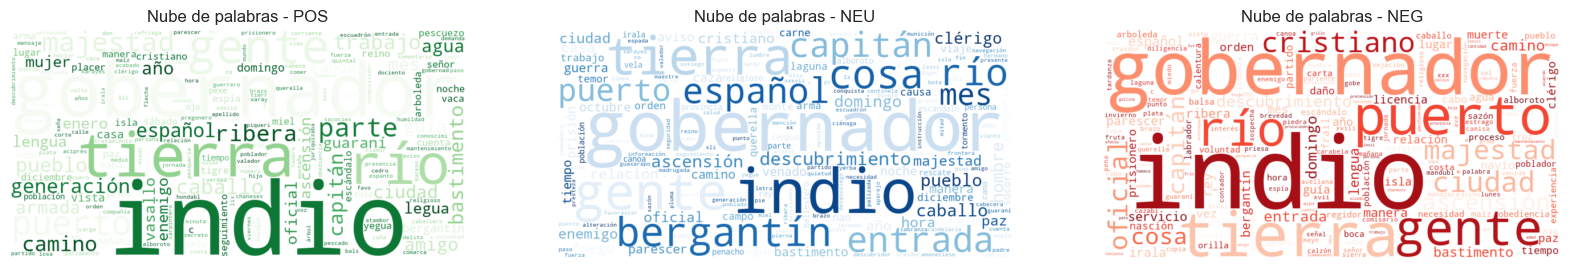

In [332]:
# Generación de nubes de palabras por sentimiento
# Esta función genera nubes de palabras para cada sentimiento en el DataFrame df_sentimiento.
def nube_por_sentimiento(df_sentimiento, stopwords_completas):
    # Paletas personalizadas
    paletas = {
        "POS": "Greens",
        "NEG": "Reds",
        "NEU": "Blues"
    }

    wordclouds = {}
    # Generar nubes de palabras por sentimiento
    for sentimiento in df_sentimiento["sentimiento"].unique():
        textos = df_sentimiento[df_sentimiento["sentimiento"] == sentimiento]["texto"]
        palabras = []
        for texto in textos:
            doc = nlp(texto.lower())
            palabras += [
                    t.lemma_ for t in doc 
                    if t.pos_ == "NOUN" and t.is_alpha and normalizar(t.lemma_.lower()) not in stopwords_completas
            ]
        conteo = Counter(palabras)
        wordclouds[sentimiento] = WordCloud(width=800, height=400, background_color='white', colormap=paletas.get(sentimiento, 'gray')  # Color por tipo
                                            ).generate_from_frequencies(conteo)
    
    # Mostrar nubes
    fig, axes = plt.subplots(1, len(wordclouds), figsize=(20, 6))
    for ax, (sent, wc) in zip(axes, wordclouds.items()):
        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f"Nube de palabras - {sent}")
        ax.axis("off")
    plt.show()

# Llamado:
nube_por_sentimiento(df_sentimiento, stopwords_completas)

### Co-ocurrencia de entidades por párrafos

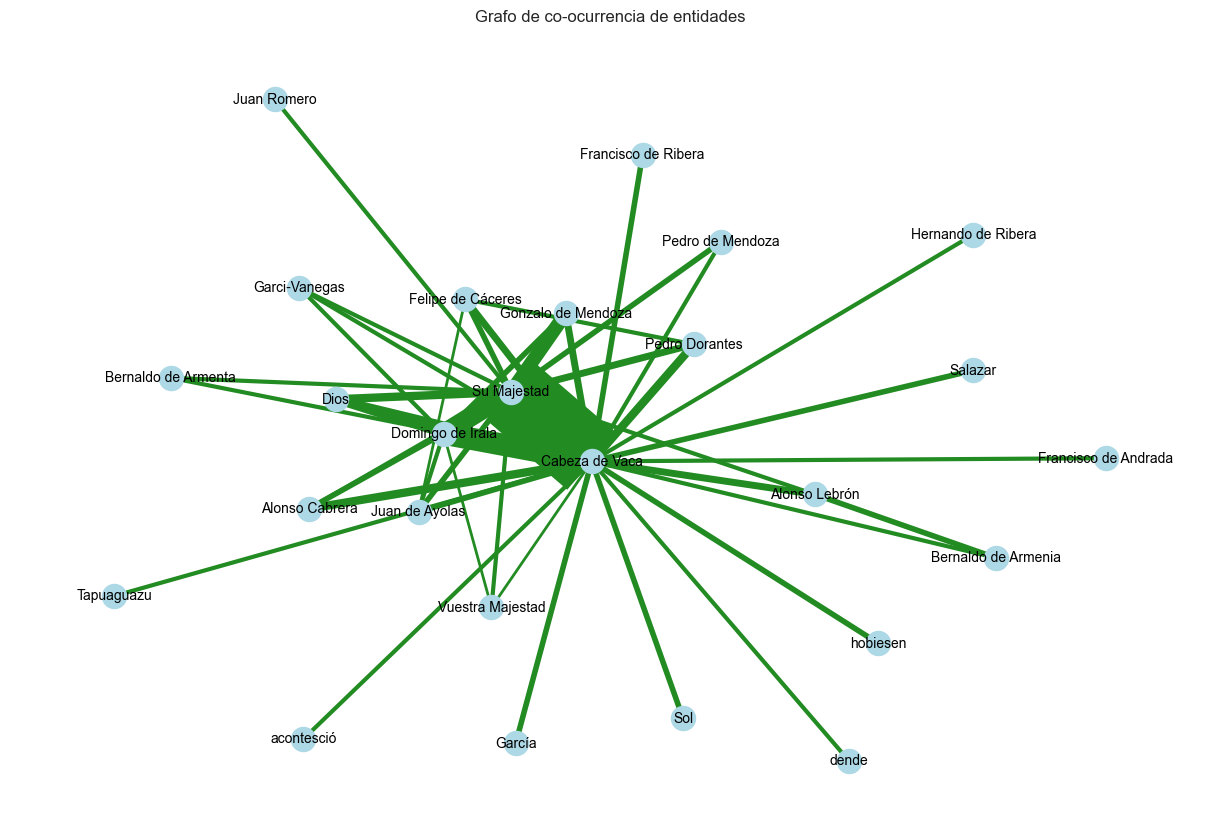

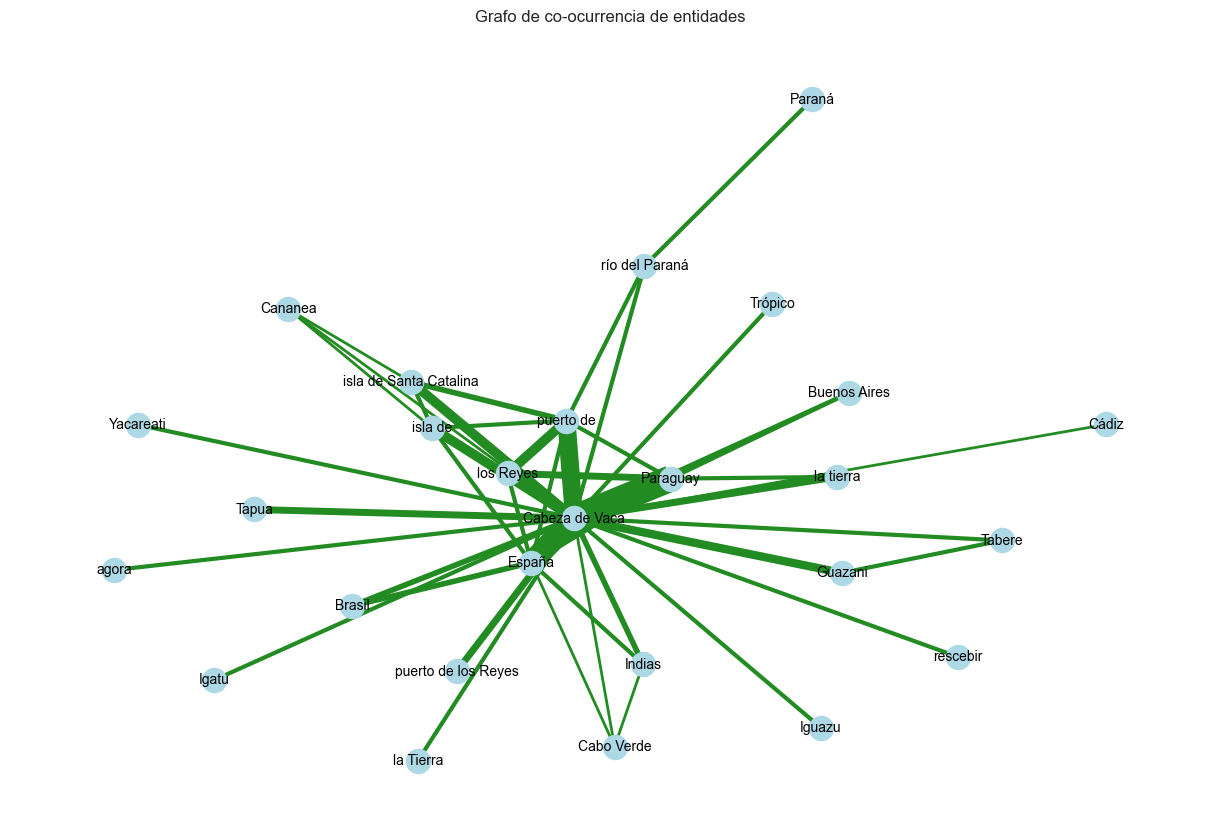

In [333]:
# Función para calcular co-ocurrencia de entidades
def coocurrencia_entidades(texto, tipo_entidades=["PER", "LOC"], por="parrafo"):
    fragmentos = texto.split("\n") if por == "parrafo" else texto.split(".")
    coocurrencias = []
    for fragmento in fragmentos:
        doc = nlp(fragmento)
        entidades = [ent.text for ent in doc.ents if ent.label_ in tipo_entidades]
        # Regla manual: si aparece "gobernador", se lo suma como entidad
        if "gobernador" in fragmento.lower():
            entidades.append("Cabeza de Vaca")
        entidades = list(set(entidades))  # sin repeticiones
        if len(entidades) > 1:
            coocurrencias.extend(combinations(entidades, 2))
    contador = Counter(coocurrencias)
    return contador

def grafo_coocurrencia(contador, top_n=50):
    G = nx.Graph()
    for (ent1, ent2), peso in contador.most_common(top_n):
        G.add_edge(ent1, ent2, weight=peso)
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.9)
    pesos = [G[u][v]['weight'] for u,v in G.edges()]
    nx.draw(G, pos, with_labels=True, width=pesos, node_color='lightblue', edge_color='forestgreen', font_size=10)
    plt.title("Grafo de co-ocurrencia de entidades")
    plt.show()

contador = coocurrencia_entidades(comentarios_txt, tipo_entidades=["PER"], por="parrafo")
grafo_coocurrencia(contador)

contador2 = coocurrencia_entidades(comentarios_txt, tipo_entidades=["LOC"], por="parrafo")
grafo_coocurrencia(contador2)